## Looking into uncertainty in temperature measurements

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
from pvanalytics import quality
from pvlib import temperature
from pvlib import location

In [4]:
#readcsv
df = pd.read_csv("merged_df.csv")

if not isinstance(df["Timestamp"], pd.DatetimeIndex):
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)

In [5]:
df.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

PT JKM325

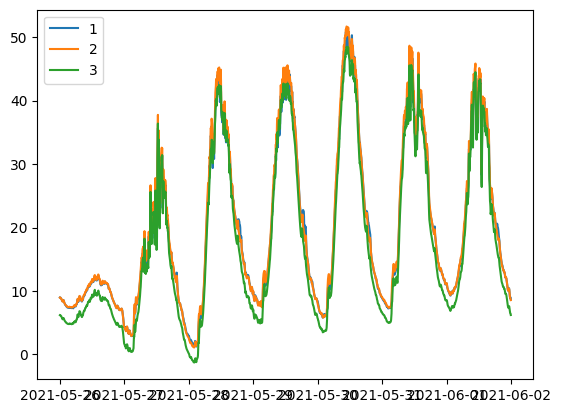

In [6]:
a='2021-05-26'
b='2021-06-01'
plt.plot(df['PT JKM325 nr 1 [°C]'].loc[a:b], label="1")
plt.plot(df['PT JKM325 nr 2 [°C]'].loc[a:b], label="2")
plt.plot(df['PT JKM325 nr 3 [°C]'].loc[a:b], label="3")
plt.legend()
plt.show()

In [7]:
def rmse(measured_temp1, measured_temp2):
    df_temp = pd.DataFrame({'measured_temp1': measured_temp1, 'measured_temp2': measured_temp2})
    df_temp = df_temp.dropna(how="any")
    #Calculating RMSE
    rmse = np.sqrt(((df_temp['measured_temp1'] - df_temp['measured_temp2'])**2).mean())
    return rmse

print('PT JKM325')
print(rmse(df['PT JKM325 nr 1 [°C]'], df['PT JKM325 nr 2 [°C]']))
print(rmse(df['PT JKM325 nr 1 [°C]'], df['PT JKM325 nr 3 [°C]']))
print(rmse(df['PT JKM325 nr 2 [°C]'], df['PT JKM325 nr 3 [°C]']))
print('PT JKM335')
print(rmse(df['PT JKM335 nr 1 [°C]'], df['PT JKM335 nr 2 [°C]']))
print(rmse(df['PT JKM335 nr 1 [°C]'], df['PT JKM335 nr 3 [°C]']))
print(rmse(df['PT JKM335 nr 2 [°C]'], df['PT JKM335 nr 3 [°C]']))
print("PT REC")
print(rmse(df['PT REC nr 1 [°C]'], df['PT REC nr 2 [°C]']))
print(rmse(df['PT REC nr 1 [°C]'], df['PT REC nr 3 [°C]']))
print(rmse(df['PT REC nr 2 [°C]'], df['PT REC nr 3 [°C]']))
print('PT SunP')
print(rmse(df['PT SunP nr 1 [°C]'], df['PT SunP nr 2 [°C]']))
print(rmse(df['PT SunP nr 1 [°C]'], df['PT SunP nr 3 [°C]']))
print(rmse(df['PT SunP nr 2 [°C]'], df['PT SunP nr 3 [°C]']))
print('PT Talesun')
print(rmse(df['PT Talesun 1 [°C]'], df['PT Talesun 2 [°C]']))
print(rmse(df['PT Talesun 1 [°C]'], df['PT Talesun 3 [°C]']))
print(rmse(df['PT Talesun 2 [°C]'], df['PT Talesun 3 [°C]']))
print("PT Talesun FrLess")
print(rmse(df['PT Talesun FrLess 1 [°C]'], df['PT Talesun FrLess 2 [°C]']))
print(rmse(df['PT Talesun FrLess 1 [°C]'], df['PT Talesun FrLess 3 [°C]']))
print(rmse(df['PT Talesun FrLess 2 [°C]'], df['PT Talesun FrLess 3 [°C]']))



PT JKM325
0.6763114212666412
2.41318360495187
2.523871726334977
PT JKM335
0.5852183975598241
1.7517784739581619
1.8032213777928152
PT REC
0.4760840059205962
0.7468507743035849
0.5743357880050785
PT SunP
0.7160851592179416
1.092198591538728
1.1598420960631537
PT Talesun
0.7178660797831043
1.0008260885047187
0.5496963491933384
PT Talesun FrLess
0.8627805217219577
0.8355169376021133
0.40052802757860007


In [8]:
print('PT JKM325')
print(rmse(df['PT JKM325 nr 1 [°C]'], (df['PT JKM325 nr 2 [°C]']+df['PT JKM325 nr 3 [°C]'])/2))
print(rmse(df['PT JKM325 nr 2 [°C]'], (df['PT JKM325 nr 1 [°C]']+df['PT JKM325 nr 3 [°C]'])/2))
print(rmse(df['PT JKM325 nr 3 [°C]'], (df['PT JKM325 nr 1 [°C]']+df['PT JKM325 nr 2 [°C]'])/2))
print('PT JKM335')
print(rmse(df['PT JKM335 nr 1 [°C]'], (df['PT JKM335 nr 2 [°C]']+df['PT JKM335 nr 3 [°C]'])/2))
print(rmse(df['PT JKM335 nr 2 [°C]'], (df['PT JKM335 nr 1 [°C]']+df['PT JKM335 nr 3 [°C]'])/2))
print(rmse(df['PT JKM335 nr 3 [°C]'], (df['PT JKM335 nr 1 [°C]']+df['PT JKM335 nr 2 [°C]'])/2))
print("PT REC")
print(rmse(df['PT REC nr 1 [°C]'], (df['PT REC nr 2 [°C]']+df['PT REC nr 3 [°C]'])/2))
print(rmse(df['PT REC nr 2 [°C]'], (df['PT REC nr 1 [°C]']+df['PT REC nr 3 [°C]'])/2))
print(rmse(df['PT REC nr 3 [°C]'], (df['PT REC nr 1 [°C]']+df['PT REC nr 2 [°C]'])/2))
print('PT SunP')
print(rmse(df['PT SunP nr 1 [°C]'], (df['PT SunP nr 2 [°C]']+df['PT SunP nr 3 [°C]'])/2))
print(rmse(df['PT SunP nr 2 [°C]'], (df['PT SunP nr 1 [°C]']+df['PT SunP nr 3 [°C]'])/2))
print(rmse(df['PT SunP nr 3 [°C]'], (df['PT SunP nr 1 [°C]']+df['PT SunP nr 2 [°C]'])/2))
print('PT Talesun')
print(rmse(df['PT Talesun 1 [°C]'], (df['PT Talesun 2 [°C]']+df['PT Talesun 3 [°C]'])/2))
print(rmse(df['PT Talesun 2 [°C]'], (df['PT Talesun 1 [°C]']+df['PT Talesun 3 [°C]'])/2))
print(rmse(df['PT Talesun 3 [°C]'], (df['PT Talesun 1 [°C]']+df['PT Talesun 2 [°C]'])/2))
print("PT Talesun FrLess")
print(rmse(df['PT Talesun FrLess 1 [°C]'], (df['PT Talesun FrLess 2 [°C]']+df['PT Talesun FrLess 3 [°C]'])/2))
print(rmse(df['PT Talesun FrLess 2 [°C]'], (df['PT Talesun FrLess 1 [°C]']+df['PT Talesun FrLess 3 [°C]'])/2))
print(rmse(df['PT Talesun FrLess 3 [°C]'], (df['PT Talesun FrLess 1 [°C]']+df['PT Talesun FrLess 2 [°C]'])/2))


PT JKM325
1.2441653873019543
1.3992757352063594
2.4458891216667196
PT JKM335
0.944861383283452
1.0148292034202577
1.753424845815238
PT REC
0.5566240121628669
0.37264116806194875
0.6223029264895314
PT SunP
0.7187643845830181
0.7942908365417878
1.0681362727921926
PT Talesun
0.8262378694590207
0.3981897967516333
0.7230897825697112
PT Talesun FrLess
0.8253932165241229
0.5273741747717657
0.49297469022828333


In [9]:
print(len(df['PT Talesun FrLess 1 [°C]']))
print(len(df['PT Talesun FrLess 2 [°C]']))
print(len(df['PT Talesun FrLess 3 [°C]']))

380136
380136
380136


### Plot with errorbars:

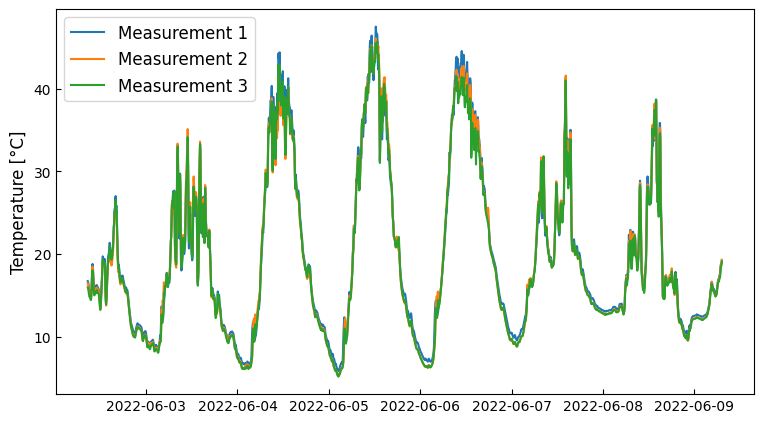

In [33]:
plt.figure(figsize=(9,5))
plt.plot(df.index[149000:151000], df["PT Talesun FrLess 1 [°C]"][149000:151000], label="Measurement 1")
plt.plot(df.index[149000:151000], df["PT Talesun FrLess 2 [°C]"][149000:151000], label="Measurement 2")
plt.plot(df.index[149000:151000], df["PT Talesun FrLess 3 [°C]"][149000:151000], label="Measurement 3")
plt.ylabel("Temperature [°C]", fontsize=12)
plt.tick_params(which="both", direction='in')
plt.legend(fontsize=12)
plt.savefig("img/measurements_talesunFrless", bbox_inches='tight')
plt.show()


In [11]:
def delta_f(T1, T2):
    delta_T1 = 0.01*T1
    delta_T2 = 0.01*T2
    f = T1-T2
    delta_f = (delta_T1**2 + delta_T2**2)**(0.5)
    return f, delta_f

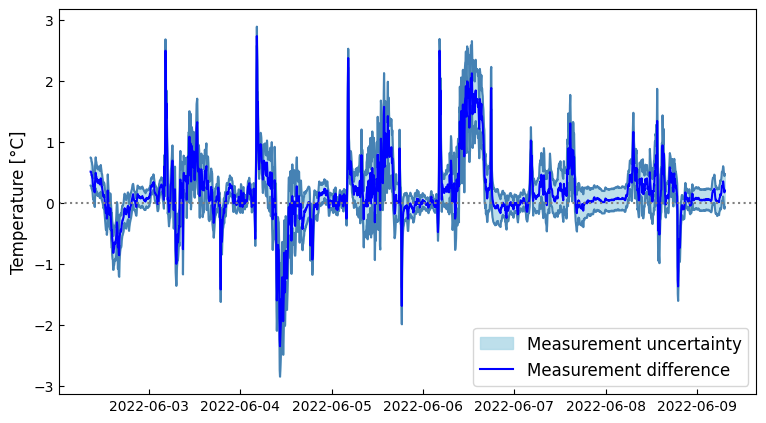

In [42]:
f, delta_F = delta_f(df['PT Talesun FrLess 2 [°C]'], df['PT Talesun FrLess 3 [°C]'])
plt.figure(figsize=(9,5))
plt.fill_between(df.index[149000:151000],f[149000:151000]-delta_F[149000:151000], f[149000:151000]+delta_F[149000:151000], color='lightblue', alpha=0.8, label='Measurement uncertainty')
plt.plot(df.index[149000:151000],f[149000:151000] -delta_F[149000:151000], color="steelblue")
plt.plot(df.index[149000:151000], f[149000:151000]+delta_F[149000:151000], color="steelblue")
plt.plot(df.index[149000:151000], f[149000:151000], color="blue", label="Measurement difference")
plt.ylabel("Temperature [°C]", fontsize=12)
plt.axhline(0, c="grey", linestyle=":")
plt.tick_params(which="both", direction='in')
plt.legend(fontsize=12)
plt.savefig("img/Uncertainty_TalesunFrless", bbox_inches='tight')
plt.show()

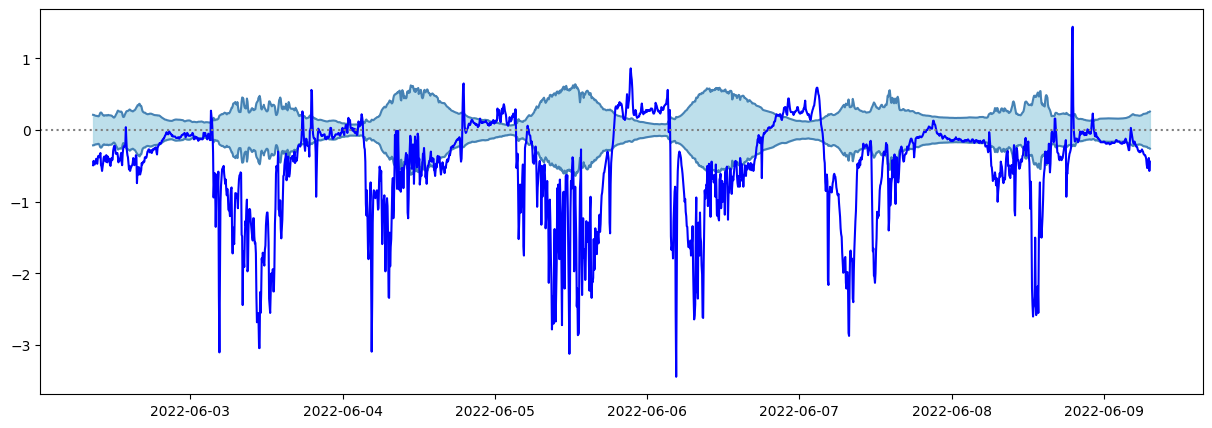

In [13]:
f, delta_F = delta_f(df['PT Talesun 3 [°C]'], df['PT Talesun 2 [°C]'])
plt.figure(figsize=(15,5))
plt.fill_between(df.index[149000:151000],-delta_F[149000:151000], delta_F[149000:151000], color='lightblue', alpha=0.8, label='Area between')
plt.plot(df.index[149000:151000], -delta_F[149000:151000], color="steelblue")
plt.plot(df.index[149000:151000], delta_F[149000:151000], color="steelblue")
plt.plot(df.index[149000:151000], f[149000:151000], color="blue")
plt.axhline(0, c="grey", linestyle=":")
plt.show()

Combining in a subplot

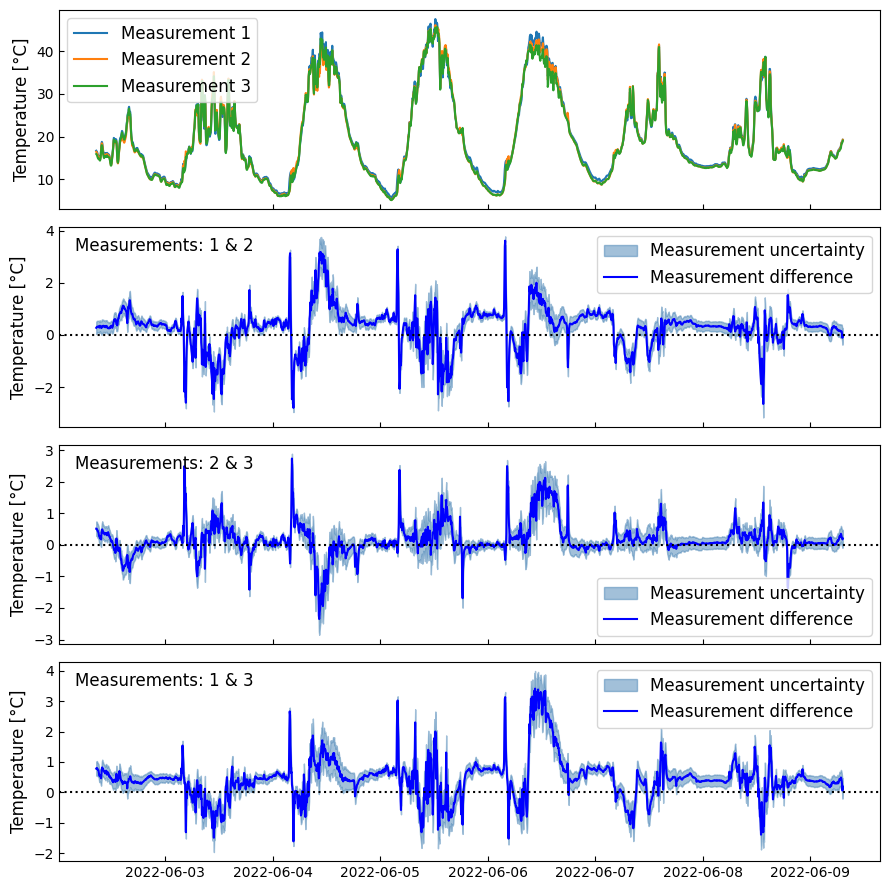

In [70]:

fig, axes = plt.subplots(4, 1, figsize=(9, 9), sharex=True) 

#Temperature plot
axes[0].plot(df.index[149000:151000], df["PT Talesun FrLess 1 [°C]"][149000:151000], label="Measurement 1")
axes[0].plot(df.index[149000:151000], df["PT Talesun FrLess 2 [°C]"][149000:151000], label="Measurement 2")
axes[0].plot(df.index[149000:151000], df["PT Talesun FrLess 3 [°C]"][149000:151000], label="Measurement 3")
axes[0].set_ylabel("Temperature [°C]", fontsize=12)
axes[0].tick_params(which="both", direction='in')
axes[0].legend(fontsize=12)

#Uncertainty plot 1
f, delta_F = delta_f(df['PT Talesun FrLess 1 [°C]'], df['PT Talesun FrLess 2 [°C]'])
axes[1].fill_between(df.index[149000:151000],f[149000:151000]-delta_F[149000:151000], f[149000:151000]+delta_F[149000:151000], color='steelblue', alpha=0.5, label='Measurement uncertainty')
#axes[1].plot(df.index[149000:151000], f[149000:151000]-delta_F[149000:151000], color="steelblue")
#axes[1].plot(df.index[149000:151000], f[149000:151000]+delta_F[149000:151000], color="steelblue")
axes[1].plot(df.index[149000:151000], f[149000:151000], color="blue", label="Measurement difference")
axes[1].set_ylabel("Temperature [°C]", fontsize=12)
axes[1].text(0.02, 0.95, "Measurements: 1 & 2", transform=axes[1].transAxes, fontsize=12, verticalalignment='top', color='black')
axes[1].axhline(0, c="black", linestyle=":")
axes[1].tick_params(which="both", direction='in')
axes[1].legend(fontsize=12)
#Uncertainty plot 1
f, delta_F = delta_f(df['PT Talesun FrLess 2 [°C]'], df['PT Talesun FrLess 3 [°C]'])
axes[2].fill_between(df.index[149000:151000],f[149000:151000]-delta_F[149000:151000], f[149000:151000]+delta_F[149000:151000], color='steelblue', alpha=0.5, label='Measurement uncertainty')
#axes[2].plot(df.index[149000:151000], f[149000:151000]-delta_F[149000:151000], color="steelblue")
#axes[2].plot(df.index[149000:151000], f[149000:151000]+delta_F[149000:151000], color="steelblue")
axes[2].plot(df.index[149000:151000], f[149000:151000], color="blue", label="Measurement difference")
axes[2].set_ylabel("Temperature [°C]", fontsize=12)
axes[2].text(0.02, 0.95, "Measurements: 2 & 3", transform=axes[2].transAxes, fontsize=12, verticalalignment='top', color='black')
axes[2].axhline(0, c="black", linestyle=":")
axes[2].tick_params(which="both", direction='in')
axes[2].legend(fontsize=12)
#Uncertainty plot 1
f, delta_F = delta_f(df['PT Talesun FrLess 1 [°C]'], df['PT Talesun FrLess 3 [°C]'])
axes[3].fill_between(df.index[149000:151000],f[149000:151000]-delta_F[149000:151000], f[149000:151000]+delta_F[149000:151000], color='steelblue', alpha=0.5, label='Measurement uncertainty')
#axes[3].plot(df.index[149000:151000], f[149000:151000]-delta_F[149000:151000], color="steelblue")
#axes[3].plot(df.index[149000:151000], f[149000:151000]+delta_F[149000:151000], color="steelblue")
axes[3].plot(df.index[149000:151000], f[149000:151000], color="blue", label="Measurement difference")
axes[3].set_ylabel("Temperature [°C]", fontsize=12)
axes[3].text(0.02, 0.95, "Measurements: 1 & 3", transform=axes[3].transAxes, fontsize=12, verticalalignment='top', color='black')
axes[3].axhline(0, c="black", linestyle=":")
axes[3].tick_params(which="both", direction='in')
axes[3].legend(fontsize=12)

plt.tight_layout()
plt.savefig("img/uncertainty_TalesunFrless", bbox_inches='tight')
plt.show()


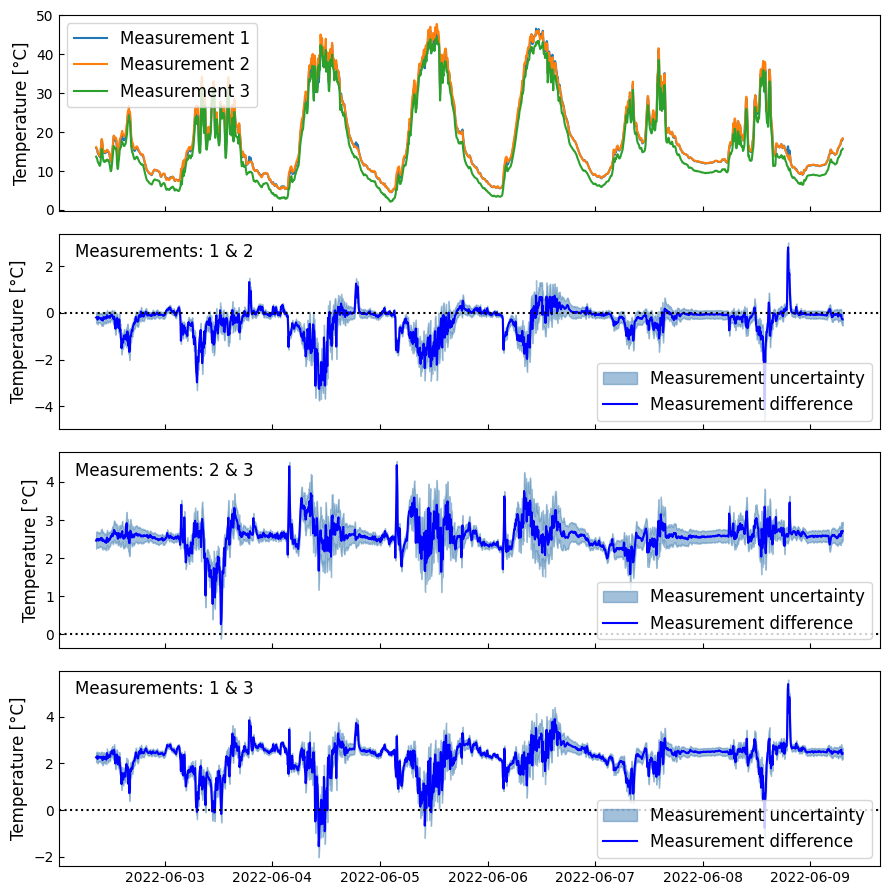

In [72]:

fig, axes = plt.subplots(4, 1, figsize=(9, 9), sharex=True) 

#Temperature plot
axes[0].plot(df.index[149000:151000], df["PT JKM325 nr 1 [°C]"][149000:151000], label="Measurement 1")
axes[0].plot(df.index[149000:151000], df["PT JKM325 nr 2 [°C]"][149000:151000], label="Measurement 2")
axes[0].plot(df.index[149000:151000], df["PT JKM325 nr 3 [°C]"][149000:151000], label="Measurement 3")
axes[0].set_ylabel("Temperature [°C]", fontsize=12)
axes[0].tick_params(which="both", direction='in')
axes[0].legend(fontsize=12)

#Uncertainty plot 1
f, delta_F = delta_f(df["PT JKM325 nr 1 [°C]"], df["PT JKM325 nr 2 [°C]"])
axes[1].fill_between(df.index[149000:151000],f[149000:151000]-delta_F[149000:151000], f[149000:151000]+delta_F[149000:151000], color='steelblue', alpha=0.5, label='Measurement uncertainty')
#axes[1].plot(df.index[149000:151000], f[149000:151000]-delta_F[149000:151000], color="steelblue")
#axes[1].plot(df.index[149000:151000], f[149000:151000]+delta_F[149000:151000], color="steelblue")
axes[1].plot(df.index[149000:151000], f[149000:151000], color="blue", label="Measurement difference")
axes[1].set_ylabel("Temperature [°C]", fontsize=12)
axes[1].text(0.02, 0.95, "Measurements: 1 & 2", transform=axes[1].transAxes, fontsize=12, verticalalignment='top', color='black')
axes[1].axhline(0, c="black", linestyle=":")
axes[1].tick_params(which="both", direction='in')
axes[1].legend(fontsize=12)
#Uncertainty plot 1
f, delta_F = delta_f(df["PT JKM325 nr 2 [°C]"], df["PT JKM325 nr 3 [°C]"])
axes[2].fill_between(df.index[149000:151000],f[149000:151000]-delta_F[149000:151000], f[149000:151000]+delta_F[149000:151000], color='steelblue', alpha=0.5, label='Measurement uncertainty')
#axes[2].plot(df.index[149000:151000], f[149000:151000]-delta_F[149000:151000], color="steelblue")
#axes[2].plot(df.index[149000:151000], f[149000:151000]+delta_F[149000:151000], color="steelblue")
axes[2].plot(df.index[149000:151000], f[149000:151000], color="blue", label="Measurement difference")
axes[2].set_ylabel("Temperature [°C]", fontsize=12)
axes[2].text(0.02, 0.95, "Measurements: 2 & 3", transform=axes[2].transAxes, fontsize=12, verticalalignment='top', color='black')
axes[2].axhline(0, c="black", linestyle=":")
axes[2].tick_params(which="both", direction='in')
axes[2].legend(fontsize=12)
#Uncertainty plot 1
f, delta_F = delta_f(df["PT JKM325 nr 1 [°C]"], df["PT JKM325 nr 3 [°C]"])
axes[3].fill_between(df.index[149000:151000],f[149000:151000]-delta_F[149000:151000], f[149000:151000]+delta_F[149000:151000], color='steelblue', alpha=0.5, label='Measurement uncertainty')
#axes[3].plot(df.index[149000:151000], f[149000:151000]-delta_F[149000:151000], color="steelblue")
#axes[3].plot(df.index[149000:151000], f[149000:151000]+delta_F[149000:151000], color="steelblue")
axes[3].plot(df.index[149000:151000], f[149000:151000], color="blue", label="Measurement difference")
axes[3].set_ylabel("Temperature [°C]", fontsize=12)
axes[3].text(0.02, 0.95, "Measurements: 1 & 3", transform=axes[3].transAxes, fontsize=12, verticalalignment='top', color='black')
axes[3].axhline(0, c="black", linestyle=":")
axes[3].tick_params(which="both", direction='in')
axes[3].legend(fontsize=12)

plt.tight_layout()
plt.savefig("img/uncertainty_JKM325", bbox_inches='tight')
plt.show()


#### Checking statistical significance:

In [ ]:
def stat_significance(T1, T2):
    delta_T1 = 0.01*T1
    delta_T2 = 0.01*T2
    f = T1-T2
    delta_f = (delta_T1**2 + delta_T2**2)**(0.5)
    significant = 0
    non_significant = 0
    for i in range(len(delta_f)):
        if (f[i]-delta_f[i])*(f[i]>0)>0 or (f[i]+delta_f[i])*(f[i]<0)<0:
            significant+=1
        else:
            non_significant+=1
    return significant, non_significant


stat_significance(df['PT Talesun FrLess 1 [°C]'], df['PT Talesun FrLess 3 [°C]'])


C:\Users\tonea\AppData\Local\Temp\ipykernel_11292\3193587350.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



(330207, 49929)

In [ ]:
print('PT JKM325')
print(stat_significance(df['PT JKM325 nr 1 [°C]'], df['PT JKM325 nr 2 [°C]']))
print(stat_significance(df['PT JKM325 nr 1 [°C]'], df['PT JKM325 nr 3 [°C]']))
print(stat_significance(df['PT JKM325 nr 2 [°C]'], df['PT JKM325 nr 3 [°C]']))
print('PT JKM335')
print(stat_significance(df['PT JKM335 nr 1 [°C]'], df['PT JKM335 nr 2 [°C]']))
print(stat_significance(df['PT JKM335 nr 1 [°C]'], df['PT JKM335 nr 3 [°C]']))
print(stat_significance(df['PT JKM335 nr 2 [°C]'], df['PT JKM335 nr 3 [°C]']))
print("PT REC")
print(stat_significance(df['PT REC nr 1 [°C]'], df['PT REC nr 2 [°C]']))
print(stat_significance(df['PT REC nr 1 [°C]'], df['PT REC nr 3 [°C]']))
print(stat_significance(df['PT REC nr 2 [°C]'], df['PT REC nr 3 [°C]']))
print('PT SunP')
print(stat_significance(df['PT SunP nr 1 [°C]'], df['PT SunP nr 2 [°C]']))
print(stat_significance(df['PT SunP nr 1 [°C]'], df['PT SunP nr 3 [°C]']))
print(stat_significance(df['PT SunP nr 2 [°C]'], df['PT SunP nr 3 [°C]']))
print('PT Talesun')
print(stat_significance(df['PT Talesun 1 [°C]'], df['PT Talesun 2 [°C]']))
print(stat_significance(df['PT Talesun 1 [°C]'], df['PT Talesun 3 [°C]']))
print(stat_significance(df['PT Talesun 2 [°C]'], df['PT Talesun 3 [°C]']))
print("PT Talesun FrLess")
print(stat_significance(df['PT Talesun FrLess 1 [°C]'], df['PT Talesun FrLess 2 [°C]']))
print(stat_significance(df['PT Talesun FrLess 1 [°C]'], df['PT Talesun FrLess 3 [°C]']))
print(stat_significance(df['PT Talesun FrLess 2 [°C]'], df['PT Talesun FrLess 3 [°C]']))

PT JKM325


C:\Users\tonea\AppData\Local\Temp\ipykernel_11292\3193587350.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



(209462, 170674)
(366992, 13144)
(372345, 7791)
PT JKM335
(196130, 184006)
(292608, 87528)
(286689, 93447)
PT REC
(325033, 55103)
(336400, 43736)
(242598, 137538)
PT SunP
(295117, 85019)
(363547, 16589)
(364147, 15989)
PT Talesun
(340570, 39566)
(341015, 39121)
(240432, 139704)
PT Talesun FrLess
(329740, 50396)
(330207, 49929)
(158344, 221792)
